# Single Character Network

The purpose of this network is to identify which alphanumeric value a CAPTCHA character and takes a centered 32x32 input.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
x = np.load('data/x_single.npy')
y = np.load('data/y_single_pos.npy')

print(f"x shape: {x.shape}")
print(f'y shape: {y.shape}')

x shape: (23400, 32, 32, 3)
y shape: (23400,)
1.0


In [15]:
#Converting to greyscale
x = np.mean(x, axis=3)
print(x.shape)

(23400, 32, 32)


In [16]:
#Normalizing
x /= 256
print(f"max x : {np.max(x)}")
print(f"min y : {np.min(x)}")

max x : 0.99609375
min y : 0.0


In [17]:
#Shuffling
print("These should be different")
print(x[0,0,:])
idx = np.arange(x.shape[0])
np.random.shuffle(idx)
x = x[idx, :, :]
y = y[idx]
print(x[0,0,:])
print(x.shape)
print(y.shape)

These should be different
[0.62890625 0.73046875 0.8828125  0.859375   0.8125     0.71875
 0.7890625  0.96484375 0.7890625  0.640625   0.671875   0.6640625
 0.62890625 0.71875    0.77734375 0.62890625 0.56640625 0.58984375
 0.76953125 0.93359375 0.765625   0.72265625 0.8359375  0.86328125
 0.8671875  0.91015625 0.90625    0.82421875 0.7421875  0.66015625
 0.60546875 0.5703125 ]
[0.65625    0.640625   0.65234375 0.6640625  0.6328125  0.6015625
 0.640625   0.78125    0.92578125 0.79296875 0.65625    0.58984375
 0.60546875 0.609375   0.46875    0.3203125  0.29296875 0.34375
 0.38671875 0.36328125 0.33984375 0.30859375 0.2734375  0.2421875
 0.23828125 0.234375   0.23046875 0.2265625  0.2421875  0.296875
 0.359375   0.3125    ]
(23400, 32, 32)
(23400,)


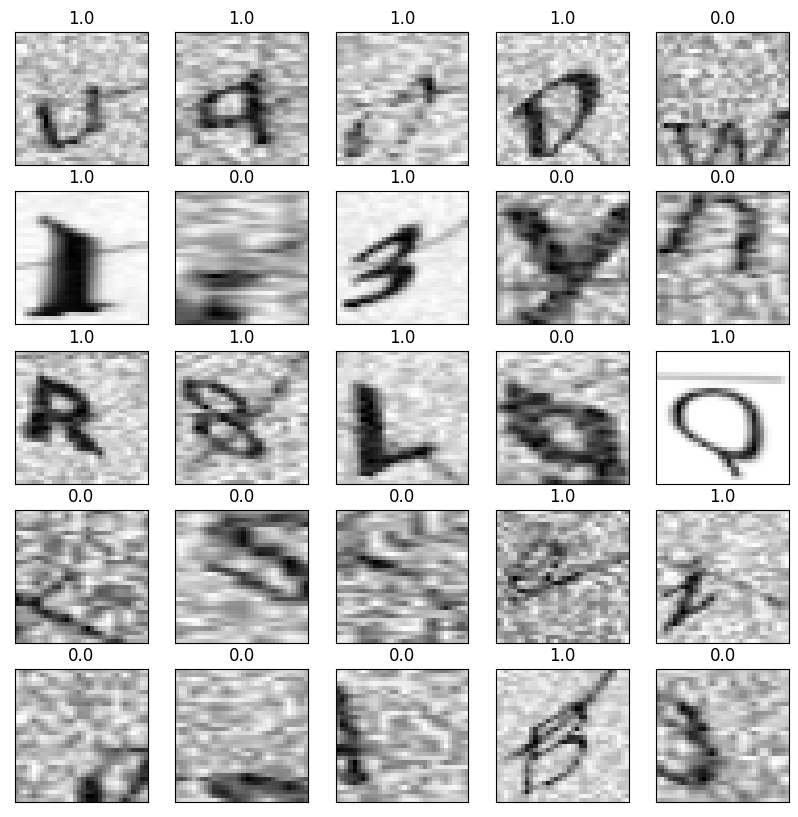

In [21]:
fig, axs = plt.subplots(5,5)
N = x.shape[0]
fig.set_size_inches(10,10)
for i in range(5):
    for j in range(5):
        ax = axs[i,j]
        idx = np.random.randint(N)
        ax.imshow((x[idx,:,:]), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(y[idx])
plt.show()

In [24]:
x = np.squeeze(x)
print(x.shape)

(23400, 32, 32, 3)


In [25]:
#We need to have a singlton dim for chans dimention
if(len(x.shape) == 3):
    x = x[:, :, :, None]
print(x.shape)
np.save('data/x_single_preprocessed.npy', x)
np.save('data/y_single_pos_preprocessed.npy', y)
print("Preprocessed data saved to disk")

(23400, 32, 32, 3)
Preprocessed data saved to disk


In [26]:
#Splitting the data in to test and training sets. Going with a 80/20 
#Also getting dev sets for debugging and tuning hyper parameters.

x = np.load('data/x_single_preprocessed.npy')
y = np.load('data/y_single_label_preprocessed.npy')

N = x.shape[0]

split_idx = int(N * 0.8)
test_split = 3000
x_train = x[:split_idx,:, :, :]
x_val = x[split_idx:-test_split, :, :, :]
x_test = x[-test_split:, :, :, :]
x_train_dev = x[:3000, :, :, :]
x_val_dev = x[split_idx:split_idx+500, :, :, :]

y_train = y[:split_idx] 
y_val = y[split_idx:-test_split]
y_test = y[-test_split:]
y_train_dev = y[:3000]
y_val_dev = y[split_idx:split_idx+500]

dataset = (x_train, x_val, x_test, x_train_dev, x_val_dev, y_train, y_val, y_test, y_train_dev, y_val_dev)

for datum in dataset:
    print(datum.shape)


(18720, 32, 32, 3)
(1680, 32, 32, 3)
(3000, 32, 32, 3)
(3000, 32, 32, 3)
(500, 32, 32, 3)
(18720,)
(71880,)
(3000,)
(3000,)
(500,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

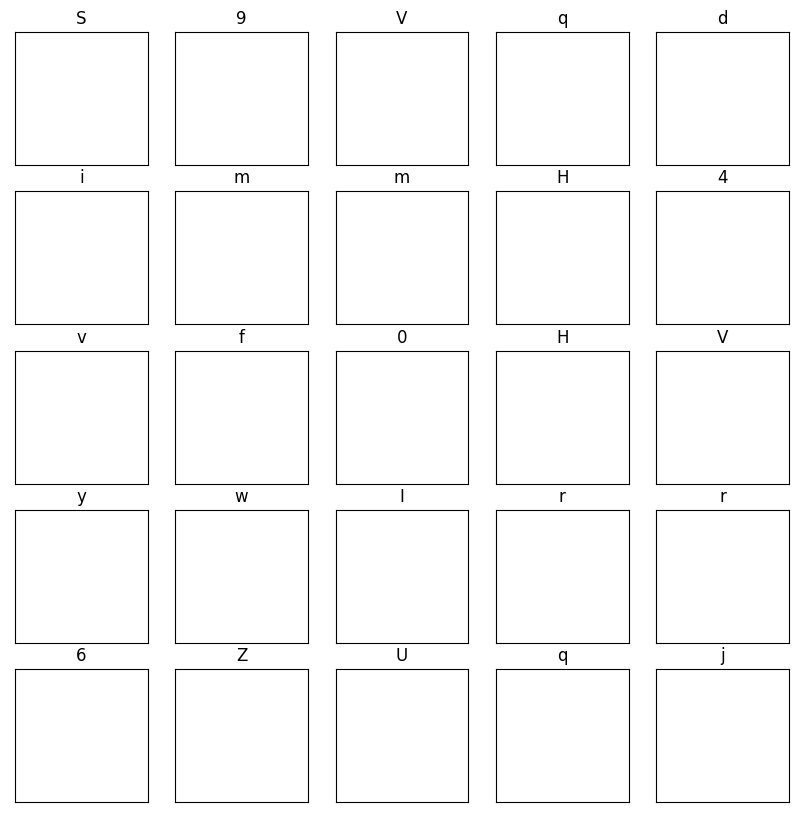

In [27]:
fig, axs = plt.subplots(5,5)
N = x.shape[0]
fig.set_size_inches(10,10)
for i in range(5):
    for j in range(5):
        ax = axs[i,j]
        idx = np.random.randint(N)
        ax.imshow((x[idx,:,:]), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(y[idx])
plt.show()

In [22]:
# single character recognition
single = models.Sequential()
#CNN layer
single.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,1)))
single.add(layers.MaxPooling2D((2, 2)))
single.add(layers.Conv2D(64, (3, 3), activation='relu'))
single.add(layers.MaxPooling2D((2, 2)))
single.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Dense Layer
single.add(layers.Flatten())
single.add(layers.Dense(64, activation='relu'))
single.add(layers.Dense(32)) 
# change to total alphanumeric  unique values
# change cross entropy to 

single.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [23]:
#Training Network
single.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

single_history = single.fit(x_train_dev, y_train_dev, epochs=10, 
                    validation_data=(x_val_dev, y_val_dev))


Epoch 1/10


2023-04-13 22:20:20.569452: W tensorflow/core/framework/op_kernel.cc:1722] OP_REQUIRES failed at cast_op.cc:121 : UNIMPLEMENTED: Cast string to float is not supported


UnimplementedError: Graph execution error:

Detected at node 'Cast_1' defined at (most recent call last):
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/traitlets/config/application.py", line 976, in launch_instance
      app.start()
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/base_events.py", line 600, in run_forever
      self._run_once()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/base_events.py", line 1896, in _run_once
      handle._run()
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/ky/zwy_sqz53dq1snkl02kn0ykhbvzlsb/T/ipykernel_66397/2560134614.py", line 6, in <module>
      single_history = single.fit(x_train_dev, y_train_dev, epochs=10,
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/keras/engine/training.py", line 894, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/keras/engine/training.py", line 987, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/keras/engine/compile_utils.py", line 501, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/keras/utils/metrics_utils.py", line 70, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/keras/metrics/base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "/Users/yamadk/Library/Python/3.10/lib/python/site-packages/keras/metrics/base_metric.py", line 637, in update_state
      y_true = tf.cast(y_true, self._dtype)
Node: 'Cast_1'
Cast string to float is not supported
	 [[{{node Cast_1}}]] [Op:__inference_train_function_7656]

94/94 - 0s - loss: 0.0511 - accuracy: 0.9813 - 270ms/epoch - 3ms/step


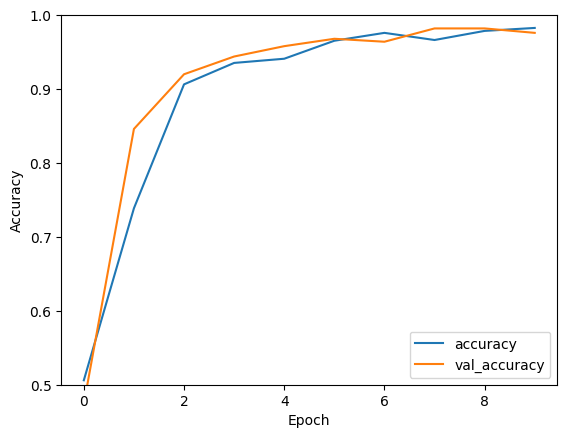

In [19]:
#Plotting Training Data
plt.plot(single_history.history['accuracy'], label='accuracy')
plt.plot(single_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
#Printing the test set accuracy
test_loss, test_acc = single.evaluate(x_test,  y_test, verbose=2)
